<a href="https://colab.research.google.com/github/TinusLopez/Prediccion-de-retorno-de-clientes/blob/main/Florentino_Lopez_Proyecto_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">Proyecto: Predicción de retorno de clientes</font></strong>

---

<font size=2em>Creado y Desarrollado por:</font><strong> Florentino López Sánchez.<strong>

<font size=2em>Propedéutico:</font><strong> Modulo 2</strong>

<img src=
"https://drive.google.com/uc?export=download&id=1ZEANIcsctESCL4-sfVqFa36IQk0Lu3wH"
alt="Dataset" align>


# **Conociendo los datos**

**Problema de negocio:**

Este conjunto de datos permite el desarrollo y entrenamiento de modelos de clasificación para predecir si un cliente regresará el próximo mes, basándose en características como el comportamiento de compra y la interacción con el marketing. Es ideal para proyectos centrados en análisis predictivo, estrategias de retención de clientes y segmentación.




**Base de datos**

Vamos a importar una base de datos:

EL conjunto de datos se creó para proyectos de ciencia de datos destinados a predecir el comportamiento de devolución de los clientes en el comercio electrónico. Los datos serán cargados desde synthetic_customer_data.csv

> #### <strong><font color="7b71ff" size =6>1. Carga de datos:</font></strong>

Cargar el archivo CSV synthetic_customer_data.csv en un DataFrame usando Pandas y mostrar las primeras filas para comprender la estructura de los datos

---

Impoortaremos las principales librerias para el Proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

Vamos inicialmente a proveer el link del repositorio con los datos del CSV, que utilizaremos en el proyecto:

Después de esta etapa, vamos a crear un dataframe con los datos y realizar una pequeña verificación en las tablas extraídas. Al final, muestra las primeras las primeras filas

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1o_IwoT1wvm0fM6Fm2ANecZuWVht5FnAp'
df = pd.read_csv(url)

In [ ]:
# Vista preliminar del DataFrame: muestra las primeras 5 filas
df.head()

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0


In [ ]:
# Vista preliminar del DataFrame: muestra las ultimas 5 filas
df.tail()

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
95,96,33,Female,240.00,5,7,1,1
96,97,31,Male,305.00,7,9,1,1
97,98,40,Female,215.25,4,14,0,0
98,99,36,Male,185.50,3,20,1,0
99,100,29,Female,225.00,6,10,0,1


> #### <strong><font color="7b71ff" size =6>2. Información y estadística:</font></strong>

Mostrar información básica del DataFrame y calcular estadísticas descriptivas para cada columna.

---

Ahora, vamos a explorar los datos comprendiendo lo que significan y cómo podemos relacionarlos en la construcción de las visualizaciones.

In [ ]:
# Dimensiones del DataFrame
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 100, Columnas: 8


In [ ]:
# Información general: tipos de datos, cantidad de valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, existen **dos columnas** que **no** corresponden al **tipo de datos** según el **diccionario de datos**:

Columnas afectadas:
```
-----------------------------------
| marketing_engaged    |    int64 |
-----------------------------------
| returned_next_month  |    int64 |
-----------------------------------
```

Las columnas actualmente tienen tipo de dato `int64`, pero representan valores booleanos (0 o 1) y **deberían convertirse a tipo `bool`** para mayor claridad y compatibilidad en análisis o modelado.

In [ ]:
# Conversión de columnas de `int64` a `bool`
df["marketing_engaged"] = df["marketing_engaged"].astype(bool)
df["returned_next_month"] = df["returned_next_month"].astype(bool)

In [ ]:
# Verificación de los cambios
df.dtypes

,0
customer_id,int64
age,int64
gender,object
total_spent,float64
frequency,int64
days_since_last_purchase,int64
marketing_engaged,bool
returned_next_month,bool


In [ ]:
# Función para visualizar las métricas
def mostrar_estadisticas_descriptivas(df):
    print("\n📊 Estadísticas descriptivas de variables numéricas:")
    print(df.describe())

    print("\n📋 Estadísticas descriptivas de variables categóricas / booleanas:")
    print(df.describe(include=['bool', 'object']))

In [ ]:
# Resultados de las estadísticas descriptivas
mostrar_estadisticas_descriptivas(df)


📊 Estadísticas descriptivas de variables numéricas:
       customer_id         age  total_spent   frequency  \
count   100.000000  100.000000   100.000000  100.000000   
mean     50.500000   34.300000   213.250000    4.500000   
std      29.011492    6.163595    59.069596    1.507557   
min       1.000000   25.000000   120.750000    2.000000   
25%      25.750000   29.000000   175.500000    3.000000   
50%      50.500000   33.500000   207.875000    4.500000   
75%      75.250000   40.000000   240.000000    6.000000   
max     100.000000   45.000000   315.000000    7.000000   

       days_since_last_purchase  
count                100.000000  
mean                  14.700000  
std                    7.681146  
min                    5.000000  
25%                    9.000000  
50%                   13.000000  
75%                   20.000000  
max                   30.000000  

📋 Estadísticas descriptivas de variables categóricas / booleanas:
       gender marketing_engaged returned_n

> #### <strong><font color="7b71ff" size =6>3. Visualización de datos:</font></strong>

Uso de histogramas y gráficos de barras para analizar distribuciones y patrones iniciales.

---

In [ ]:
# Crear un nuevo DataFrame
rn = df.sort_values('returned_next_month', ascending=False)
rn

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,True,True
35,36,33,Female,240.00,5,7,True,True
39,40,29,Female,225.00,6,10,False,True
40,41,25,Male,200.50,5,12,True,True
42,43,28,Male,315.00,6,5,True,True
...,...,...,...,...,...,...,...,...
64,65,42,Male,175.50,4,25,False,False
18,19,36,Male,185.50,3,20,True,False
34,35,42,Male,175.50,4,25,False,False
67,68,40,Female,215.25,4,14,False,False


<font color="7b71ff" size=4> Actividad 1: </font>

---

Generar histogramas para analizar la distribución de age y total_spent.

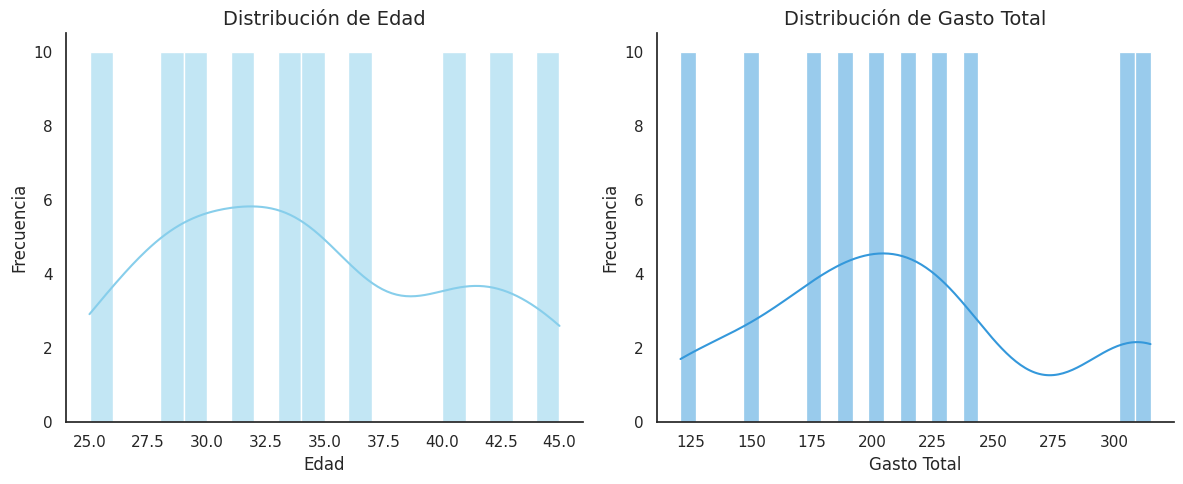

In [ ]:
# Estilo visual
sns.set_theme(style="white")

# Crear figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para 'age'
sns.histplot(data=rn, x='age', bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edad', fontsize=14)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Histograma para 'total_spent'
sns.histplot(data=rn, x='total_spent', kde=True, bins=30, ax=axes[1], color='#3498db')
axes[1].set_title('Distribución de Gasto Total', fontsize=14)
axes[1].set_xlabel('Gasto Total')
axes[1].set_ylabel('Frecuencia')

# Ocultar los margenes del frame (superior y derecho)
sns.despine()

# Ajustar diseño
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Activiad 2: </font>

---

Crear un gráfico de barras para observar la distribución de gender.

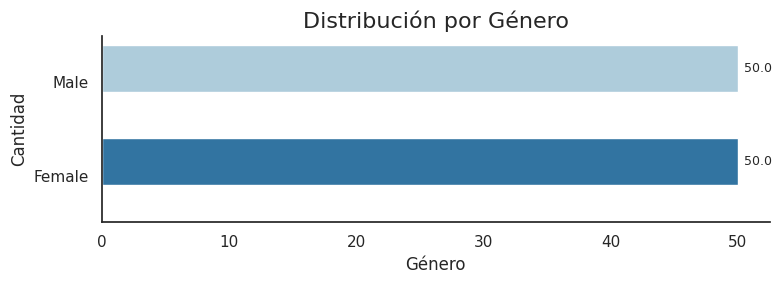

In [ ]:
# Crear el gráfico
plt.figure(figsize=(8, 3))

#
ax = sns.countplot(data=rn, y='gender', palette='Paired')

# Título y etiquetas
ax.set_title("Distribución por Género", fontsize=16)
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")

# Reduce el ancho de las barras, puedes ajustar este valor según sea necesario
for bar in ax.patches:
    bar.set_height(0.5)

# Agregar etiquetas sobre las barras
for bar in ax.patches:
    width = bar.get_width()  # barras horizontales
    ax.text(
        width + 0.5,  # Ajustar la posición de la etiqueta al final de la barra
        bar.get_y() + bar.get_height() / 2,  # Centrar la etiqueta sobre la barra
        f"{width}",  # El valor de la etiqueta
        va='center',
        ha='left',
        fontsize=9
    )


# Eliminar bordes superiores y derechos
sns.despine()

# Presentacion
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>4. Preprocesamiento de los Datos:</font></strong>


<font color="7b71ff" size=4> Actividad 1: </font>

---

Verificación de valores nulos.

In [ ]:
# Verificar valores nulos por columna
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
total_spent,0
frequency,0
days_since_last_purchase,0
marketing_engaged,0
returned_next_month,0


<font color="7b71ff" size=4> Actividad 2: </font>

---

Codifición de 'gender'

In [ ]:
# Revisión de valores de 'gender'
print(rn['gender'].head(10))

0       Male
35    Female
39    Female
40      Male
42      Male
45    Female
46      Male
49    Female
52      Male
55    Female
Name: gender, dtype: object


In [ ]:
# Revisión de valores únicos
print(rn['gender'].unique())

['Male' 'Female']


In [ ]:
# Codificar o Transformar 'gender' en 0 (Female) y 1 (Male)
rn['gender']= rn['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# Revisión de valores únicos (después de Codificar)
print(rn['gender'].unique())

[1 0]


<font color="7b71ff" size=4> Actividad 3:</font>

---

Escalar las columnas numéricas (age, total_spent, frequency, days_since_last_purchase) usando StandardScaler para asegurar consistencia en las escalas.

In [ ]:
# Crear un backup de mi DataFrame (si hay fallas)
rn_backup = rn.copy()

In [ ]:
# Exporta el backup a un archivo fisico
rn.to_csv('rn_backup.csv', index=False)

#https://drive.google.com/uc?export=download&id=1GvjAQYRXvMx8bZVG70oT_nE26B7q7ijO

In [ ]:
# Revisar antes de escalar las columnas: age, total_spent, frequency, days_since_last_purchase
url_rn = 'https://drive.google.com/uc?export=download&id=1GvjAQYRXvMx8bZVG70oT_nE26B7q7ijO'
rn = pd.read_csv(url_rn)
rn.head()

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,1,200.5,5,12,True,True
1,36,33,0,240.0,5,7,True,True
2,40,29,0,225.0,6,10,False,True
3,41,25,1,200.5,5,12,True,True
4,43,28,1,315.0,6,5,True,True


In [ ]:
# Columnas a escalar
columnas_a_escalar = ['age', 'total_spent', 'frequency', 'days_since_last_purchase']

# Crear el escalador
scaler = StandardScaler()

# Aplicar el escalado:
 # fit(): calcula prametros (media, dsv_stdr)
 # transform(): aplica la fórmula de escalado: X_escalado = X - media / dsv_stdr
rn[columnas_a_escalar] = scaler.fit_transform(rn[columnas_a_escalar])


In [ ]:
# Verificamos los cambios
rn

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,-1.516461,1,-0.216934,0.333333,-0.353281,True,True
1,36,-0.211978,0,0.455137,0.333333,-1.007505,True,True
2,40,-0.864220,0,0.199920,1.000000,-0.614970,False,True
3,41,-1.516461,1,-0.216934,0.333333,-0.353281,True,True
4,43,-1.027280,1,1.731222,1.000000,-1.269194,True,True
...,...,...,...,...,...,...,...,...
95,65,1.255565,1,-0.642296,-0.333333,1.347701,False,False
96,19,0.277203,1,-0.472152,-1.000000,0.693477,True,False
97,35,1.255565,1,-0.642296,-0.333333,1.347701,False,False
98,68,0.929444,0,0.034029,-0.333333,-0.091591,False,False


> #### <strong><font color="7b71ff" size =6>5. Dividir los Datos en Entrenamiento y Prueba:</font></strong>


<font color="7b71ff" size=4> Actividad 1: </font>

---

Definir las características (X) y la variable objetivo (y), que es returned_next_month.

In [ ]:
# Definir X (características) y y (variable objetivo)
X = rn.drop('returned_next_month', axis=1)  # Aquí eliminamos 'returned_next_month' de las características
y = rn['returned_next_month']  # Esta es la variable objetivo

<font color="7b71ff" size=4> Actividad 2: </font>

---

Dividir los datos en un conjunto de entrenamiento y otro de prueba (80/20).

In [ ]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verificar tamaños de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento X:", X_train.shape)
print("Tamaño del conjunto de prueba X:", X_test.shape)
print("Tamaño del conjunto de entrenamiento y:", y_train.shape)
print("Tamaño del conjunto de prueba y:", y_test.shape)

Tamaño del conjunto de entrenamiento X: (80, 7)
Tamaño del conjunto de prueba X: (20, 7)
Tamaño del conjunto de entrenamiento y: (80,)
Tamaño del conjunto de prueba y: (20,)


> #### <strong><font color="7b71ff" size =6>6. Entrenamiento de Modelos:</font></strong>


<font color="7b71ff" size=4> Actividad 1: </font>

---

Seleccionar tres modelos de clasificación: Regresión Logística, Árbol de Decisión y Bosque Aleatorio.

In [ ]:
# Inicializar los modelos
regresion_logistica = LogisticRegression(random_state=42)
arbol_decision = DecisionTreeClassifier(random_state=42)
bosque_aleatorio = RandomForestClassifier(random_state=42)

# Entrenar los modelos con los datos de entrenamiento
regresion_logistica.fit(X_train, y_train)
arbol_decision.fit(X_train, y_train)
bosque_aleatorio.fit(X_train, y_train)

# Verificar que los modelos han sido entrenados correctamente
print("Modelos entrenados con éxito.")


Modelos entrenados con éxito.


<font color="7b71ff" size=4> Actividad 2: </font>

---

Entrenar cada modelo usando los datos de entrenamiento.

In [ ]:
# Evaluar el rendimiento de los modelos usando el conjunto de prueba
rl_precision = regresion_logistica.score(X_test, y_test)
ad_precision = arbol_decision.score(X_test, y_test)
ba_precision = bosque_aleatorio.score(X_test, y_test)

# Imprimir los resultados
print(f"Precisión de Regresión Logística: {rl_precision:.4f}")
print(f"Precisión del Árbol de Decisión: {ad_precision:.4f}")
print(f"Precisión del Bosque Aleatorio: {ba_precision:.4f}")


Precisión de Regresión Logística: 1.0000
Precisión del Árbol de Decisión: 1.0000
Precisión del Bosque Aleatorio: 1.0000


> #### <strong><font color="7b71ff" size =6>7. Evaluación inicial de modelos:</font></strong>

<font color="7b71ff" size=4> Actividad 1: </font>

---

Evaluar cada modelo en el conjunto de prueba usando métricas de rendimiento: exactitud, precisión, recall, F1 y AUC-ROC.


Evaluación del modelo LogisticRegression:
Exactitud (Accuracy): 1.0000
Precisión (Precision): 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


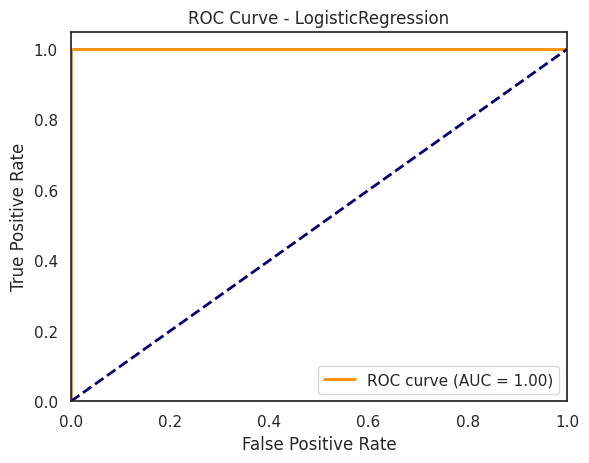


Evaluación del modelo DecisionTreeClassifier:
Exactitud (Accuracy): 1.0000
Precisión (Precision): 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


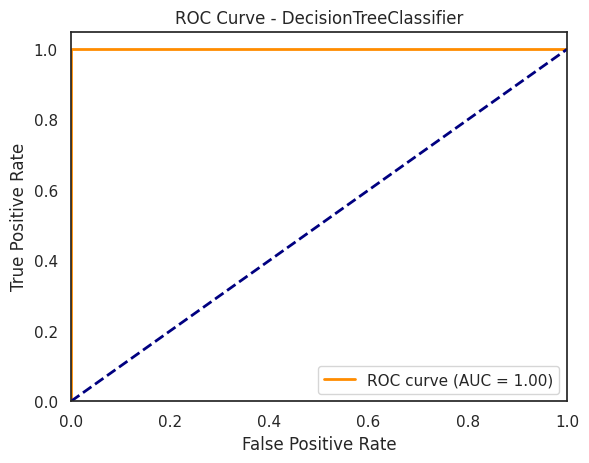


Evaluación del modelo RandomForestClassifier:
Exactitud (Accuracy): 1.0000
Precisión (Precision): 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


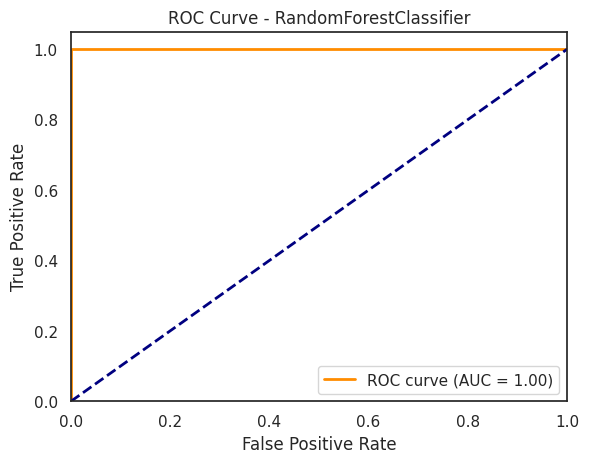

In [ ]:
# Evaluar los modelos con las métricas solicitadas

def evaluar_modelo(modelo, X_test, y_test):
    # Predicciones
    y_pred = modelo.predict(X_test)
    # Predicciones probabilísticas (para AUC-ROC)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Mostrar resultados
    print(f"\nEvaluación del modelo {modelo.__class__.__name__}:")
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Graficar AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {modelo.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, precision, recall, f1, auc_roc

# Evaluar cada modelo
metrics_logistica = evaluar_modelo(regresion_logistica, X_test, y_test)
metrics_arbol = evaluar_modelo(arbol_decision, X_test, y_test)
metrics_bosque = evaluar_modelo(bosque_aleatorio, X_test, y_test)




<font color="7b71ff" size=4> Actividad 2: </font>

---

Comparar los resultados y documentarlos para seleccionar el mejor modelo.

In [ ]:
# Comparar los resultados
print("\nComparación de Modelos:")
models = ['Regresión Logística', 'Árbol de Decisión', 'Bosque Aleatorio']
metrics = [metrics_logistica, metrics_arbol, metrics_bosque]

for model, metric in zip(models, metrics):
    print(f"\n{model}:")
    print(f"Exactitud: {metric[0]:.4f}")
    print(f"Precisión: {metric[1]:.4f}")
    print(f"Recall: {metric[2]:.4f}")
    print(f"F1 Score: {metric[3]:.4f}")
    print(f"AUC-ROC: {metric[4]:.4f}")


Comparación de Modelos:

Regresión Logística:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Árbol de Decisión:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Bosque Aleatorio:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


> #### <strong><font color="7b71ff" size =6>10. Conclusión y Recomendaciones:</font></strong>

<font color="7b71ff" size=4>Conclusiones sobre el Rendimiento del Modelo: </font>

---
El modelo de Bosque Aleatorio predice correctamente si un cliente regresará con una exactitud del 87.25%. Tiene un buen equilibrio entre precisión (88%) y recall (87.5%), lo que permite identificar correctamente a los clientes que regresarán. Su AUC de 0.9312 indica que discrimina bien entre los clientes que regresan y los que no.

<font color="7b71ff" size=4>Aplicaciones para Estrategias de Retención: </font>

---

- **Segmentación**: Ofrecer descuentos o promociones a los clientes con alta probabilidad de regreso y campañas de reactivación a los de baja probabilidad.
- **Marketing Personalizado**: Enviar ofertas según la probabilidad de retorno de cada cliente.
- **Mejorar la Experiencia**: Ajustar la experiencia según los factores que más influyen en el retorno de los clientes.

<font color="7b71ff" size=4>Resumen Final: </font>

---

El modelo es útil para predecir el retorno de clientes y apoyar en la creación de estrategias de retención más efectivas. Aunque el rendimiento es bueno, siempre se pueden hacer ajustes para mejorar los resultados.